## Introduction

Welcome to the workshop "What can we see in Hi-C?" by Leonid Mirny. 
Your assistant for this workshop is Aleksandra (Alex) Galitsyna. 
For any questions, feel free to reach out to agalitizina@gmail.com

This workshop is mostly based on tutorials of Open Chromosome Collective (Open2C). 
For more detailed examples of Hi-C data analysis, see: https://github.com/open2c/open2c_examples

### Workshop outline



1. [Qualitative analysis](#Qualitative-analysis-of-Hi-C-maps)

    - Public databases with Hi-C data
    
    - Interactive browser of Hi-C data: resgen and higlass
    
    - Navigating Hi-C maps: TADs, dots, compartents
    
    - Associating Hi-C with other epigenetics data

2. [Quantitative analysis](#Quantitative-analysis-of-Hi-C-maps)

    - Load and navigate Hi-C in Python
    
    - Scaling plots
    
    - Insulation
    
    - Pileups
    
    - Compartments
    
    - Saddle plots


### Qualitative analysis of Hi-C maps

[go top](#Workshop-outline)


    1. Public databases with Hi-C data
    
    2. Interactive browser of Hi-C data: resgen and higlass
    
    3. Navigating Hi-C maps: TADs, dots, compartents
    
    4. Associating Hi-C with other epigenetics data: CTCF, histone modifications (open-end task)

<!---  Take Hi-C maps from 4DN browser (potentially, Micro-C as there is a lot to be seen)
Load data to Resgen through Python
Add positions of genes and tracks of chromosomes
Navigation on Hi-C maps: TADs, compartments, loops/dots
Change between linear and logarithmic scale
Adding functional annotations: 
CTCF
Histone modification: H3K27ac
Open-end task: add any modification that you like from ENCODE and try to visually analyse the relation to Hi-C, how are they related to TADs and compartments; select the region that you like the most (effect is most pronounced; you will study it later in more details) ---->


### Quantitative analysis of Hi-C maps

[go top](#Workshop-outline)

We think of Hi-C map as a 2D matrix with numbers. Each row and column corresponds to the bin in the genome, and the number represents the probability of interactions between corresponding two bins.

<!--- Quantitative Hi-C data analysis in Python: start with data visualisation in Python. 
Scalings; scaling derivative; demonstration of the changes in Rad21KO <30 min>
Insulation, visualization of the track  for WT <15 min>
Stackup of insulation at boundaries (CTCF or boundary-prominence defined)  for WT
On-diagonal pileup: average boundary  for WT
Off-diagonal pileup: how boundaries interact with each other for WT
Compartments, visualization of the track; demonstration of changes in mutants <15 min>
Saddle plot for WT
Open-end task: do we see the changes of compartmental strength in mutants? Repeat all the analysis by yourself. They actually can do scatter plots. <Compare and do that with any methods you’ve learned or that you have>
---->

#### Load and navigate Hi-C in Python
    


In [1]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import libraries for Hi-C analysis

import cooler
import cooltools

In [2]:
cooltools.print_available_datasets()

1) HFF_MicroC : Micro-C data from HFF human cells for two chromosomes (hg38) in a multi-resolution mcool format. 
	Downloaded from https://osf.io/3h9js/download 
	Stored as test.mcool 
	Original md5sum: e4a0fc25c8dc3d38e9065fd74c565dd1

2) HFF_CTCF_fc : ChIP-Seq fold change over input with CTCF antibodies in HFF cells (hg38). Downloaded from ENCODE ENCSR000DWQ, ENCFF761RHS.bigWig file 
	Downloaded from https://osf.io/w92u3/download 
	Stored as test_CTCF.bigWig 
	Original md5sum: 62429de974b5b4a379578cc85adc65a3

3) HFF_CTCF_binding : Binding sites called from CTCF ChIP-Seq peaks for HFF cells (hg38). Peaks are from ENCODE ENCSR000DWQ, ENCFF498QCT.bed file. The motifs are called with gimmemotifs (options --nreport 1 --cutoff 0), with JASPAR pwm MA0139. 
	Downloaded from https://osf.io/c9pwe/download 
	Stored as test_CTCF.bed.gz 
	Original md5sum: 61ecfdfa821571a8e0ea362e8fd48f63

4) hESC_MicroC : Micro-C data from human ES cells for two chromosomes (hg38) in a multi-resolution mcool for

In [3]:
# download test data
# this file is 145 Mb, and may take a few seconds to download

data_dir = './data/'
cool_file = cooltools.download_data("HFF_MicroC", cache=True, data_dir=data_dir)    
print(cool_file)

Test dataset HFF_MicroC (file test.mcool) is not in the cache directory ./data/
downloading: https://osf.io/3h9js/download as ./data/test.mcool
./data/test.mcool


The file we just downloaded, test.mcool, contains Micro-C data from HFF cells for two chromosomes in a [multi-resolution mcool format](https://cooler.readthedocs.io/en/latest/schema.html?highlight=mcool#multi-resolution).

In [4]:
# to print which resolutions are stored in the mcool, use list_coolers
cooler.fileops.list_coolers(f'{data_dir}/test.mcool')

['/resolutions/1000',
 '/resolutions/10000',
 '/resolutions/100000',
 '/resolutions/1000000']

In [5]:
### to load a cooler with a specific resolution use the following syntax:
clr = cooler.Cooler(f'{data_dir}/test.mcool::resolutions/1000000')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
chromstarts = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

chromosomes: ['chr2', 'chr17'], binsize: 1000000
chr2 : (0, 243)
chr17 : (243, 327)


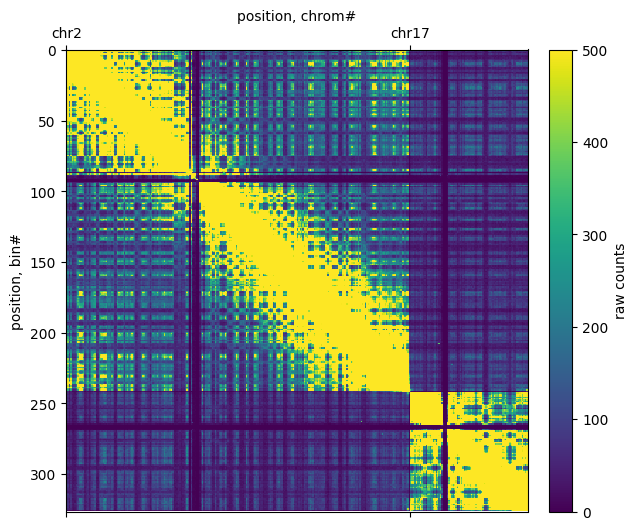

In [6]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

#### Scaling plots
    


#### Insulation
    


#### Pileups
    


#### Compartments
    


#### Saddle plots
